# Student Performance Classifier (Project 1)

##### OneR algorithm
-Nrepesh Joshi

The OneR algorithm is quite simple but can be quite effective, showing the power of using even basic statistics in many applications. The algorithm is:

* For each variable
    * For each value of the variable
        * The prediction based on this variable goes the most frequent class
        * Compute the error of this prediction
    * Sum the prediction errors for all values of the variable
* Use the variable with the lowest error

### Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
2 sex - student's sex (binary: 'F' - female or 'M' - male)<br>
3 age - student's age (numeric: from 15 to 22)<br>
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary 
education or 4 â€“ higher education)<br>
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
16 schoolsup - extra educational support (binary: yes or no)<br>
17 famsup - family educational support (binary: yes or no)<br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
19 activities - extra-curricular activities (binary: yes or no)<br>
20 nursery - attended nursery school (binary: yes or no)<br>
21 higher - wants to take higher education (binary: yes or no)<br>
22 internet - Internet access at home (binary: yes or no)<br>
23 romantic - with a romantic relationship (binary: yes or no)<br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
30 absences - number of school absences (numeric: from 0 to 93)<br>

##### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)<br>
31 G2 - second period grade (numeric: from 0 to 20)<br>
32 G3 - final grade (numeric: from 0 to 20, output target)



## Exploratory Data Analysis 

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv("student-por.csv",sep=';')

In [127]:
df = df.drop(columns = ['G2','G1'], axis = 1) # Remove the other grades as we will not use them to train the model 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [129]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


In [130]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.204719


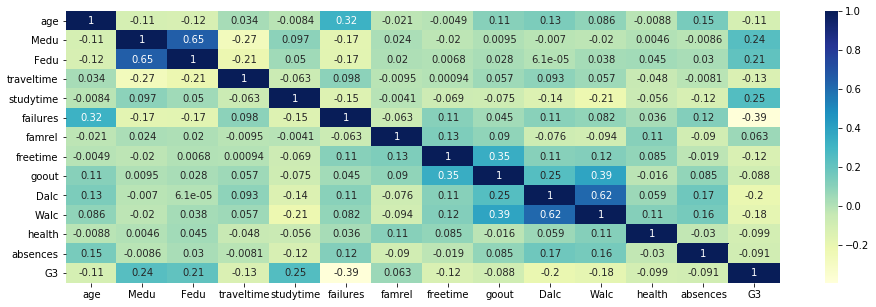

In [131]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

We see that the highest correlation of 'G3' is with 'Medu', 'Fedu' and 'studytime' 

In [132]:
def categorize(col):
    if col >= 18:
        return 'Excel'
    elif col >= 14 and col < 18:
        return 'Satisfactory'
    else:
        return 'Unsatisfactory'

We categorize the Grades 'G3' as follows: G3>=18 --> "Excel", 14<=G3<18 --> "Satisfactory", and G3<14 --> "Unsatisfactory"

In [133]:
df['G3'] = df['G3'].apply(lambda x: categorize(x))

In [134]:
df.head()['G3']

0    Unsatisfactory
1    Unsatisfactory
2    Unsatisfactory
3      Satisfactory
4    Unsatisfactory
Name: G3, dtype: object

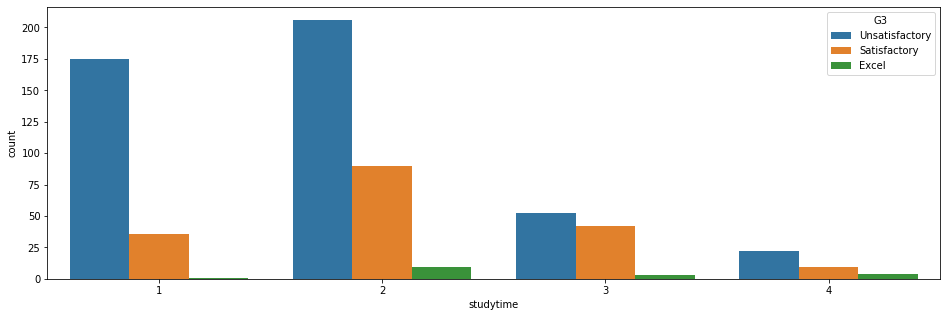

In [135]:
plt.figure(figsize = (16,5))
sns.countplot(df['studytime'], hue = df['G3'])

*This plot shows that the data has more 'Unsatisfactory' data. <br>
*We also notice that as studytime increases from 1hr to 4hrs, the 'Unsatisfactory' count decreases. <br> 
*The highest count of 'excel' comes from studytime of 2hrs. 

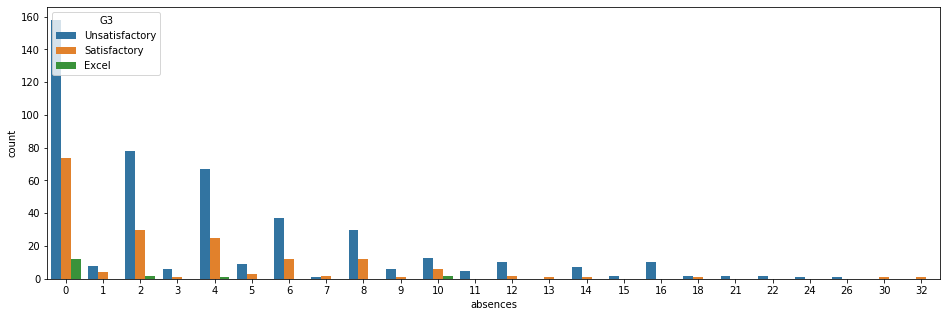

In [136]:
plt.figure(figsize = (16,5))
sns.countplot(df['absences'], hue = df['G3'])

We should notice that even with 0 absences, the "Unsatisfactory" count is more than 150

#### Highlights from data visualization:
From the above graphs we see that the data in the dataset are not balanced. We have a lot more data for ‘Unsatisfactory’ in comparison to ‘Excel.’ This might be a possible cause of bias in our model as we are using only one factor for classification.  

## Train test split

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
y = df['G3']
X = df.drop(columns = ['G3'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [139]:
# Convert to numpy array as the OneR algorithm requires arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## OneR algorithm

In [140]:
from collections import defaultdict
from operator import itemgetter

In [141]:
def train_feature_value(X,y_true,feature,value):
    class_counts = defaultdict(int)        # Dictionary for frequency of predictions
    for sample, y in zip(X, y_true):
        if sample[feature] == value:
            class_counts[y] += 1
    
    # Sorting the best one by highest first
    sorted_class_counts = sorted(class_counts.items(), key=itemgetter(1), reverse=True)
    most_frequent_class = sorted_class_counts[0][0]
    n_samples = X.shape[1]
    
    # Error in OneR is the number of samples that do not classify as most frequent class
    error = sum([class_count for class_value, class_count in class_counts.items()
                 if class_value != most_frequent_class])
    return most_frequent_class, error

In [142]:
def train(X, y_true, feature):
    n_samples, n_features = X.shape
    values = set(X[:,feature])           #Gets unique values of column 
    predictors = dict()
    errors = []
    for current_value in values:
        most_frequent_class, error = train_feature_value(X, y_true, feature, current_value)
        predictors[current_value] = most_frequent_class
        errors.append(error)
    total_error = sum(errors)            #Total sum of errors
    return predictors, total_error

In [143]:
# Computing for all the predictors 
all_predictors = {variable: train(X_train, y_train, variable) for variable in range(X_train.shape[1])}
errors = {variable: error for variable, (mapping, error) in all_predictors.items()}

# Sorting by error
best_variable, best_error = sorted(errors.items(), key=itemgetter(1))[0]
print("The best model is based on variable {0} and has error {1:.2f}".format(best_variable, best_error))

model = {'variable': best_variable,
         'predictor': all_predictors[best_variable][0]}

The best model is based on variable 29 and has error 138.00


In [144]:
# Predicts using the model that we created and the key value assigned to it
def predict(X_test, model):
    variable = model['variable']
    predictor = model['predictor']    
    y_predicted = np.array([predictor[int(sample[variable])] for sample in X_test])
    return np.array(y_predicted)

In [145]:
y_predicted = predict(X_test, model)

## Accuracy and Classification Report

In [146]:
accuracy = np.mean(y_predicted == y_test) * 100
print("The test accuracy is {:.1f}%".format(accuracy))

The test accuracy is 68.1%


In [147]:
from sklearn.metrics import classification_report

In [148]:
print(classification_report(y_test, y_predicted))

                precision    recall  f1-score   support

         Excel       0.00      0.00      0.00         3
  Satisfactory       0.50      0.02      0.04        49
Unsatisfactory       0.68      0.99      0.81       111

      accuracy                           0.68       163
     macro avg       0.39      0.34      0.28       163
  weighted avg       0.62      0.68      0.56       163



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predicting data

In [149]:
bob = pd.read_csv("bob.csv")

In [150]:
bob.head()                              #New data for prediction

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,MS,M,18,R,GT3,T,1,1,other,other,...,yes,yes,no,4,3,2,1,2,4,0


In [151]:
bob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1 non-null      object
 1   sex         1 non-null      object
 2   age         1 non-null      int64 
 3   address     1 non-null      object
 4   famsize     1 non-null      object
 5   Pstatus     1 non-null      object
 6   Medu        1 non-null      int64 
 7   Fedu        1 non-null      int64 
 8   Mjob        1 non-null      object
 9   Fjob        1 non-null      object
 10  reason      1 non-null      object
 11  guardian    1 non-null      object
 12  traveltime  1 non-null      int64 
 13  studytime   1 non-null      int64 
 14  failures    1 non-null      int64 
 15  schoolsup   1 non-null      object
 16  famsup      1 non-null      object
 17  paid        1 non-null      object
 18  activities  1 non-null      object
 19  nursery     1 non-null      object
 20  higher      1 

In [152]:
bob = bob.to_numpy()

In [153]:
bob_predicted = predict(bob,model)
print(bob_predicted)

['Unsatisfactory']


It looks like Bob was classified to be 'Unsatisfactory' from our OneR algorithm which used 'absences' as the best variable. 